In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]
d2['ratek'] = d2['rate']/1000
d2['CheckpointIntervalK']= d2['CheckpointInterval']/1000.0


/tmp/ipykernel_199185/373582888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['ratek'] = d2['rate']/1000
/tmp/ipykernel_199185/373582888.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['CheckpointIntervalK']= d2['CheckpointInterval']/1000.0


~~~
[INFO] Input: MPOLICY ondemand^M
[INFO] Input: MQUERY query5^M
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00^M
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000^M
[INFO] Input: NITERS 0^M
[INFO] Input: FLINK_RATE 2000_300000 4000_300000 6000_300000 8000_300000^M
[INFO] Input: FLINK_RATE_TYPE static^M
[INFO] Input: BUFF -1^M
[INFO] Input: NCORES 16^M
[INFO] Input: IPWINDOW 10.10.1.3^M
[INFO] Input: MCFG 1;4;16 1;8;16 1;12;16 1;16;16^M
[INFO] Input: WINDOW_LENGTH 60^M
[INFO] Input: FLINK_CHECKPOINTING_ENABLED true^M
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 5000 10000 15000^M
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once atleast_once^M
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED true
~~~

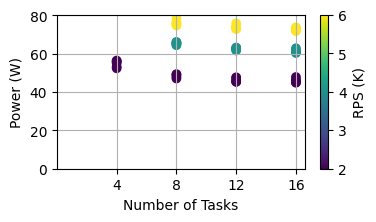

In [9]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis')
plt.colorbar(label='RPS (K)')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Tasks')
plt.ylabel('Power (W)')
#plt.title('Query5 RocksDB WindowLength 60')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
plt.savefig('q5wl60checkpoints.pdf', bbox_inches='tight')

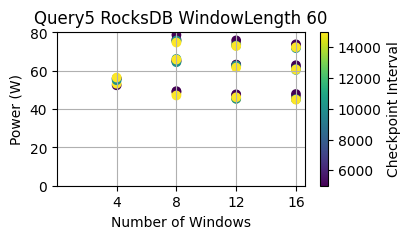

In [3]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['CheckpointInterval'], cmap='viridis')
plt.colorbar(label='Checkpoint Interval')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 60')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


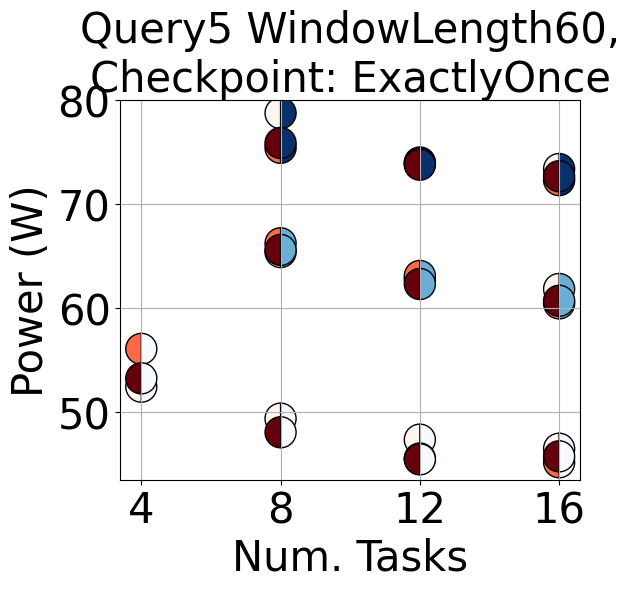

In [8]:
plt.rcParams['figure.figsize'] = 6,6
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
d3 = d2[d2['CheckpointMode'] == 'exactly_once']

fig, ax = plt.subplots()

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
scatter_c1 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.ratek, edgecolor="black", 
                        cmap='Blues', marker=MarkerStyle("o", fillstyle="right"))

scatter_c2 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.CheckpointIntervalK, edgecolor="black", 
                        cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

#cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="RPS (K)")
#cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="CheckpointInterval (K)")

ax.set_xlabel('Num. Tasks')
ax.set_ylabel('Power (W)')
#ax.set_xlim(left=left, right=right)
ax.set_ylim(top=80.0)

ax.set_title(f"Query5 WindowLength60,\nCheckpoint: ExactlyOnce", size=30)
#plt.legend(fontsize=30)
plt.tight_layout()
plt.grid()
plt.xticks(d3.nwindows.unique())
plt.savefig("query5windowlen60ckpointexactlyonce.pdf", bbox_inches='tight')

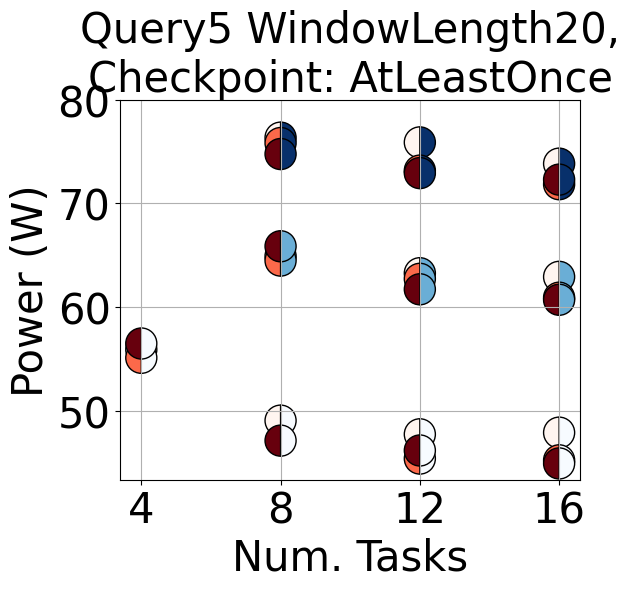

In [7]:
plt.rcParams['figure.figsize'] = 6,6
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
d3 = d2[d2['CheckpointMode'] == 'atleast_once']

fig, ax = plt.subplots()

#plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['ratek'], cmap='viridis', s=400)
scatter_c1 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.ratek, edgecolor="black", 
                        cmap='Blues', marker=MarkerStyle("o", fillstyle="right"))

scatter_c2 = ax.scatter(d3['nwindows'].tolist(),
                        d3['pkg_watts_avg'].tolist(), s=500, c=d3.CheckpointIntervalK, edgecolor="black", 
                        cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

#cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="RPS (K)")
#cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="CheckpointInterval (K)")

ax.set_xlabel('Num. Tasks')
ax.set_ylabel('Power (W)')
#ax.set_xlim(left=left, right=right)
ax.set_ylim(top=80.0)

ax.set_title(f"Query5 WindowLength20,\nCheckpoint: AtLeastOnce", size=30)
#plt.legend(fontsize=30)
plt.tight_layout()
plt.grid()
plt.xticks(d3.nwindows.unique())
plt.savefig("query5windowlen60ckpointatleastonce.pdf", bbox_inches='tight')

